In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, Flatten, Dense

In [18]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/spectral/data-preprocess.csv')
X = pd.read_csv('data/spectral/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [19]:
X_train = pd.read_csv('data/spectral/data-train.csv')
X_test = pd.read_csv('data/spectral/data-test.csv')
y_train = X_train['Class']
y_test = X_test['Class']

In [20]:
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

In [21]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

predictions = model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in predictions]

Epoch 1/10


83/83 [==============================] - 2s 7ms/step - loss: -0.0706 - accuracy: 0.4104 - val_loss: -0.2830 - val_accuracy: 0.4653
Epoch 2/10
83/83 [==============================] - 0s 3ms/step - loss: -0.3314 - accuracy: 0.4104 - val_loss: -0.5780 - val_accuracy: 0.4653
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: -2.4432 - accuracy: 0.4584 - val_loss: -4.0298 - val_accuracy: 0.6329
Epoch 4/10
83/83 [==============================] - 0s 3ms/step - loss: -6.2216 - accuracy: 0.6282 - val_loss: -6.6584 - val_accuracy: 0.7085
Epoch 5/10
83/83 [==============================] - 0s 3ms/step - loss: -8.8875 - accuracy: 0.6615 - val_loss: -9.1009 - val_accuracy: 0.7100
Epoch 6/10
83/83 [==============================] - 0s 3ms/step - loss: -10.8142 - accuracy: 0.6494 - val_loss: -11.0158 - val_accuracy: 0.6964
Epoch 7/10
83/83 [==============================] - 0s 4ms/step - loss: -13.0868 - accuracy: 0.6732 - val_loss: -12.6830 - val_accuracy: 0.6420
Epoch 8/10
83

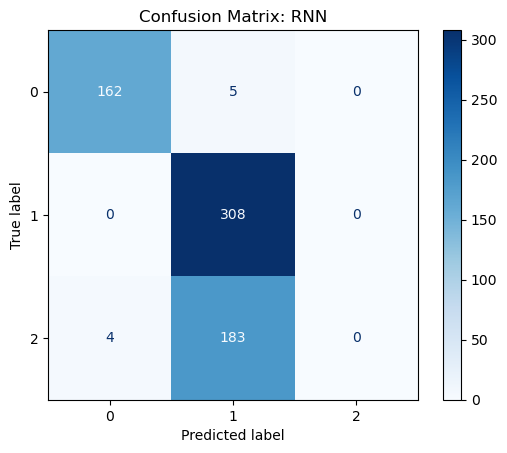

In [23]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: RNN")
plt.show()

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       167
           1       0.62      1.00      0.77       308
           2       0.00      0.00      0.00       187

    accuracy                           0.71       662
   macro avg       0.53      0.66      0.58       662
weighted avg       0.54      0.71      0.60       662



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
